![image](argospc2.jpg)

These are the libraries that are used here (and that I use on a daily basis) :

 * [Pandas](https://pandas.pydata.org/) is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
 * [Matplotlib](http://matplotlib.org) is a fairly low level plotting library for Python inspired by Matlab.
 * [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is a higher-level library built on top of matplotlib with integrated analysis and specialized plots, e.g. violinplots, boxplots, etc.
 * [Cartopy](https://scitools.org.uk/cartopy) is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])

In [36]:
# STYLE

pd.set_option("display.max_columns",None)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.labelcolor'] = '#555555'
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.figsize'] = 6,4
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titleweight'] = 'normal'
plt.rcParams['font.family'] = 'sans-serif'

## Load Data
We'll start from the argo profiles index. It's a csv file gathering infos on all the profiles from argo database. We'll use pandas.read_csv() 

In [37]:
MDATA=pd.read_csv('ftp://ftp.ifremer.fr/ifremer/argo/ar_index_global_prof.txt',sep=',', index_col=None, 
                  header=0, skiprows=8,parse_dates=[1, 7])
# MAKE THE DATE PANDAS DATETIME FOR FUTUR USE
MDATA['date']=pd.to_datetime(MDATA.date)
# GENERATE FLOAT NUMBER FROM FILE
MDATA['FloatNumber'] = MDATA.file.apply(lambda x: int(x.split('/')[1]))
#
MDATA.head(5)

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,FloatNumber
0,aoml/13857/profiles/R13857_001.nc,1997-07-29 20:03:00,0.267,-16.032,A,845,AO,2018-10-11 18:05:20,13857
1,aoml/13857/profiles/R13857_002.nc,1997-08-09 19:21:12,0.072,-17.659,A,845,AO,2018-10-11 18:05:21,13857
2,aoml/13857/profiles/R13857_003.nc,1997-08-20 18:45:45,0.543,-19.622,A,845,AO,2018-10-11 18:05:21,13857
3,aoml/13857/profiles/R13857_004.nc,1997-08-31 19:39:05,1.256,-20.521,A,845,AO,2018-10-11 18:05:21,13857
4,aoml/13857/profiles/R13857_005.nc,1997-09-11 18:58:08,0.720,-20.768,A,845,AO,2018-10-11 18:05:21,13857


## Pandas
### Basics
Pandas, with dataframe, is very powerfull to sort or query any information from the table :

In [38]:
# The older profiles in Atlantic ocean
MDATA.query('ocean == "A"').sort_values('date',ascending=True).head(5)

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,FloatNumber
140,aoml/13858/profiles/R13858_001.nc,1997-07-28 20:26:20,-0.126,-11.863,A,845,AO,2018-10-11 18:05:56,13858
0,aoml/13857/profiles/R13857_001.nc,1997-07-29 20:03:00,0.267,-16.032,A,845,AO,2018-10-11 18:05:20,13857
188,aoml/13859/profiles/R13859_001.nc,1997-07-30 14:45:11,0.236,-19.688,A,845,AO,2018-10-11 18:09:03,13859
223287,aoml/31810/profiles/R31810_001.nc,1997-08-01 07:59:00,-0.402,-27.039,A,845,AO,2018-10-11 18:04:29,31810
223411,aoml/31855/profiles/R31855_001.nc,1997-08-02 15:53:47,0.429,-34.184,A,845,AO,2018-10-11 18:05:03,31855


We want to map each profiler type to its real name (not its instrument code) (informations from Argo User's Manual, reference table 8)

In [80]:
mapping = {831:'Profiling Float', 835:'PROVOR', 836:'PROVOR', 838:'ARVOR DEEP', 
           840:'PROVOR', 841:'PROVOR', 842:'PROVOR', 843:'PROVOR', 
           844:'ARVOR', 845:'APEX', 846:'APEX', 847:'APEX', 
           849:'APEX DEEP', 851:'SOLO', 852:'SOLO', 853:'SOLO 2',
           854:'S2A', 856:'NINJA', 858:'NINJA', 860:'NEMO', 
           862:'SOLO DEEP', 863:'NAVIS A', 864:'NINJA DEEP', 865:'NOVA', 
           869:'DOVA', 870:'HM2000', 871:'COPEX', 872:'S2X', 
           873:'ALTO', 874:'SOLO DEEP', 999:'Unknown'}
MDATA['float_type'] = MDATA.profiler_type.apply(lambda x: mapping[x])
MDATA.head(5)

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,FloatNumber,float_type
0,aoml/13857/profiles/R13857_001.nc,1997-07-29 20:03:00,0.267,-16.032,A,845,AO,2018-10-11 18:05:20,13857,APEX
1,aoml/13857/profiles/R13857_002.nc,1997-08-09 19:21:12,0.072,-17.659,A,845,AO,2018-10-11 18:05:21,13857,APEX
2,aoml/13857/profiles/R13857_003.nc,1997-08-20 18:45:45,0.543,-19.622,A,845,AO,2018-10-11 18:05:21,13857,APEX
3,aoml/13857/profiles/R13857_004.nc,1997-08-31 19:39:05,1.256,-20.521,A,845,AO,2018-10-11 18:05:21,13857,APEX
4,aoml/13857/profiles/R13857_005.nc,1997-09-11 18:58:08,0.720,-20.768,A,845,AO,2018-10-11 18:05:21,13857,APEX


### Grouping
We can group item from the table and perform aggregations on each groups :

In [85]:
# Which institution generate the most profiles ?
MDATA.groupby('institution').size().sort_values(ascending=False).head()

institution
AO    1158351
IF     325893
JA     206372
CS     164727
BO      90046
dtype: int64

In [87]:
# Can we get the top 10 atlantic float (in terms of number of profiles), and plot their trajectory on a map
MDATA.query('ocean == "A"').groupby('FloatNumber').size().sort_values(ascending=False).head(10)

FloatNumber
6903242    907
3901941    753
5904010    717
3902133    688
5904013    632
1901691    607
3902101    598
1901690    584
4901586    570
4901194    562
dtype: int64

In [88]:
# REDUCE MAIN DATASET TO ATLANTIC TOP 10
cind=MDATA.query('ocean == "A"').groupby('FloatNumber').size().sort_values(ascending=False).head(10).index
THIS=MDATA[MDATA.FloatNumber.isin(cind)]
THIS.head()

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,FloatNumber,float_type
127997,aoml/1901690/profiles/R1901690_000.nc,2013-09-30 13:03:45,-4.018,-24.996,A,854,AO,2018-12-28 18:00:31,1901690,S2A
127998,aoml/1901690/profiles/R1901690_001.nc,2013-09-30 22:07:17,-4.029,-24.979,A,854,AO,2018-12-28 18:00:31,1901690,S2A
127999,aoml/1901690/profiles/R1901690_002.nc,2013-10-01 21:28:25,-4.033,-24.932,A,854,AO,2018-12-28 18:00:31,1901690,S2A
128000,aoml/1901690/profiles/R1901690_003.nc,2013-10-02 20:59:46,-4.040,-24.905,A,854,AO,2018-12-28 18:00:31,1901690,S2A
128001,aoml/1901690/profiles/R1901690_004.nc,2013-10-03 20:37:12,-4.059,-24.884,A,854,AO,2018-12-28 18:00:32,1901690,S2A


To plot the trajectories on a map we'll use cartopy and seaborn line plot

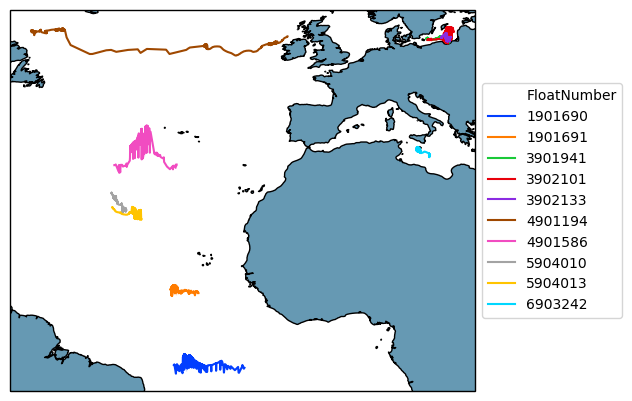

In [45]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(land_feature, edgecolor='black')
sns.lineplot(x="longitude",y="latitude",hue="FloatNumber",data=THIS,palette=sns.color_palette("bright", 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Plots with pandas/matplotlib
Directly from our dataframe, we can plot some infos about our data

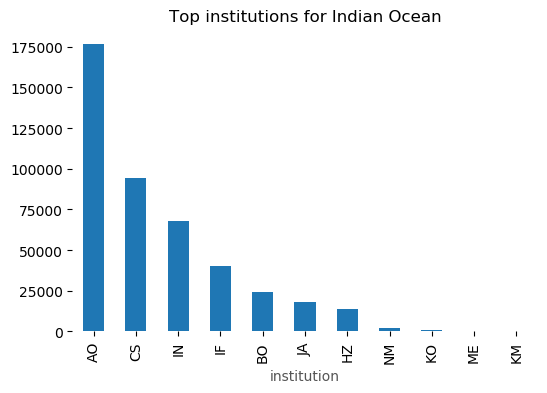

In [89]:
# Histogram
MDATA.query('ocean == "I"').groupby('institution').size().sort_values(ascending=False).plot(kind='bar',
            title='Top institutions for Indian Ocean')

## Plots with seaborn
Seaborn offers all kind of plot, let's plot a histogram with number of float per institution and per ocean

In [90]:
#UNIQUE FLOATS : KEEP LAST PROFILE FOR EACH FLOAT (SO EVERY FLOAT IS THERE, EVEN DEAD ONES)
LDATA=MDATA.groupby('FloatNumber').last()
LDATA.head(5)

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update,float_type
FloatNumber,,,,,,,,,
13857,aoml/13857/profiles/R13857_140.nc,2001-10-05 19:22:13,5.149,-24.432,A,845,AO,2018-10-11 18:05:55,APEX
13858,aoml/13858/profiles/R13858_048.nc,1998-12-27 20:00:25,4.975,-9.612,A,845,AO,2018-10-11 18:06:09,APEX
13859,aoml/13859/profiles/R13859_155.nc,2002-03-20 10:52:39,3.761,-24.448,A,845,AO,2018-10-11 18:09:43,APEX
15819,aoml/15819/profiles/R15819_121.nc,2001-03-25 10:55:30,-2.724,-39.833,A,845,AO,2018-10-11 18:06:43,APEX
15820,aoml/15820/profiles/R15820_174.nc,2002-10-30 22:41:46,-1.978,-33.492,A,845,AO,2018-10-11 18:07:31,APEX


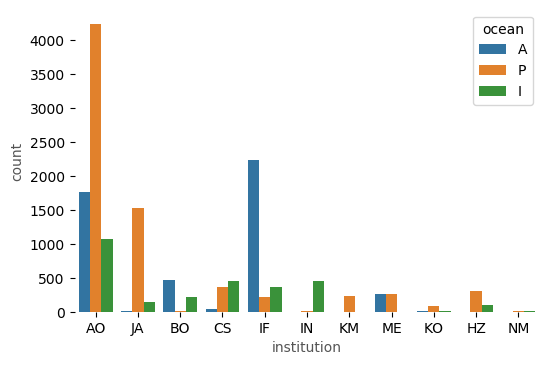

In [92]:
sns.countplot(x='institution',hue='ocean',data=LDATA)

We can see the main distribution, but if we want to reorganize the order of our institution, we can do it with the total count of float per institution

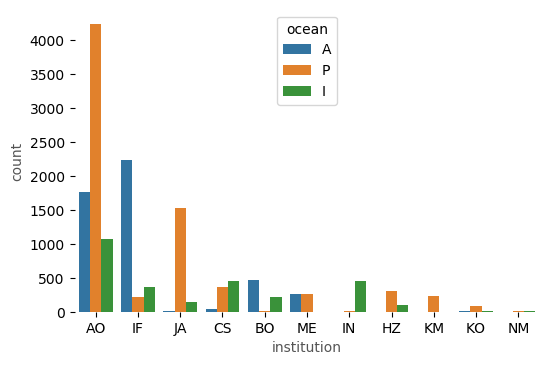

In [93]:
mind=LDATA.groupby('institution').size().sort_values(ascending=False).index
sns.countplot(x='institution',hue='ocean',data=LDATA,order=mind)

Now try plotting the distribution of "DEEP" types of floats per year : 

/export/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


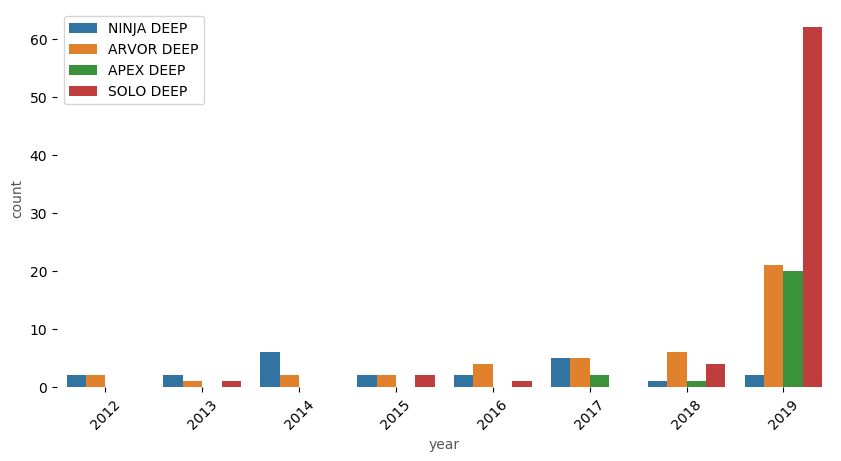

In [118]:
DHIS=LDATA.query('float_type == "ARVOR DEEP" | float_type == "APEX DEEP" | float_type == "SOLO DEEP" | float_type == "NINJA DEEP"')
DHIS['year']=DHIS.date.dt.year.values.astype('int')

plt.figure(figsize=(10,5))
sns.countplot(x='year',hue='float_type',data=DHIS)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

### KDE Plots
Kernel Density Estimation can be used in 1D and 2D plots. It is a parameter free method to estimate the PDF (probability density function) of a random variable. In our case, we can use the KDE to provide smooth boundaries of the joint probability distribution, substituting all of our data points from the scatter plot with a type of contour grid much like that which you would see in cartography. 
 
Let's see the distribution of active floats in latitude

In [60]:
#ACTIVE FLOATS : KEEP FLOAT WITH LAST DATE WITHIN THE LAST MONTH
ADATA=LDATA[LDATA.date > np.datetime64('2019-09-01')]
ADATA.head(5)

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update
FloatNumber,,,,,,,,
1900978,aoml/1900978/profiles/R1900978_363.nc,2019-09-20 05:08:49,-57.592,-104.336,P,846,AO,2019-09-20 18:04:18
1900979,aoml/1900979/profiles/R1900979_363.nc,2019-09-20 16:23:04,-42.473,142.297,I,846,AO,2019-09-21 08:04:37
1901049,aoml/1901049/profiles/R1901049_369.nc,2019-09-22 08:54:14,-6.092,57.648,I,846,AO,2019-09-23 08:04:36
1901117,aoml/1901117/profiles/R1901117_376.nc,2019-09-29 12:37:35,-39.710,47.996,I,846,AO,2019-09-30 01:04:42
1901145,csiro/1901145/profiles/R1901145_354.nc,2019-09-20 16:44:11,-47.009,141.669,I,846,CS,2019-09-23 23:39:17


Text(0.5, 1.0, 'Distribution of active floats in latitude, in each ocean')

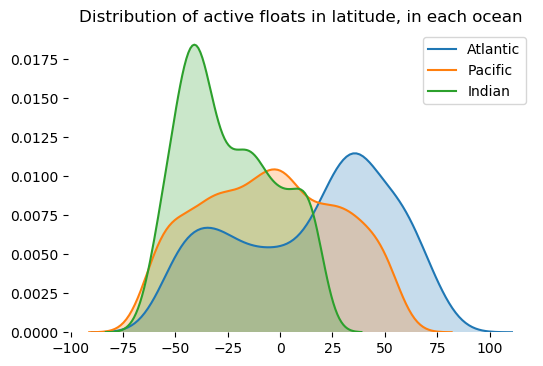

In [68]:
sns.kdeplot(ADATA.query('ocean == "A"').latitude,shade=True,label='Atlantic')
sns.kdeplot(ADATA.query('ocean == "P"').latitude,shade=True,label='Pacific')
sns.kdeplot(ADATA.query('ocean == "I"').latitude,shade=True,label='Indian')
plt.title('Distribution of active floats in latitude, in each ocean')

### 2D KDE Plots on a map
Let's try plotting the distribution of active floats for some institutions over a cartopy map

Text(0.5, 1.0, '2d KDE distributions of active floats for Aoml, Jamstec and Csiro')

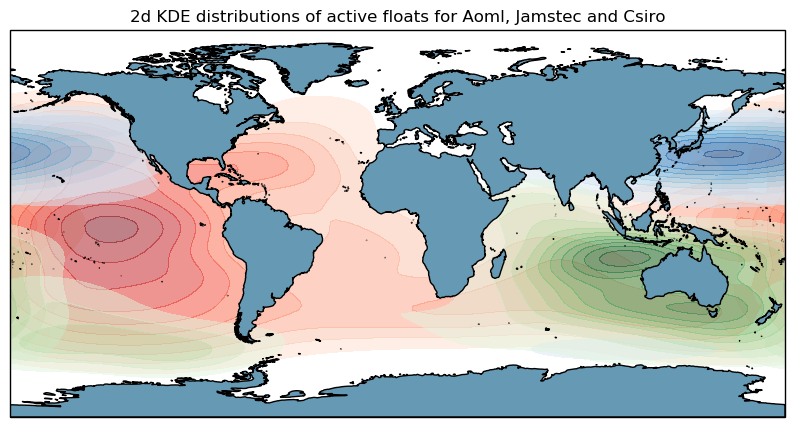

In [77]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

sns.kdeplot(ADATA.query('institution == "AO"').longitude, ADATA.query('institution == "AO"').latitude,
            cmap='Reds', shade=True, shade_lowest=False, label='Aoml', alpha=0.5)
sns.kdeplot(ADATA.query('institution == "JA"').longitude, ADATA.query('institution == "JA"').latitude,
            cmap='Blues', shade=True, shade_lowest=False, label='Jamstec', alpha=0.5)
sns.kdeplot(ADATA.query('institution == "CS"').longitude, ADATA.query('institution == "CS"').latitude,
            cmap='Greens', shade=True, shade_lowest=False, label='Csiro', alpha=0.5)
ax.add_feature(land_feature, edgecolor='black')
ax.set_global()
plt.title('2d KDE distributions of active floats for Aoml, Jamstec and Csiro')
